In [57]:
import osmnx as ox
import pandas as pd
ffm_poly= ox.geocode_to_gdf('Frankfurt am Main')

# Standatd GeoDataFrame, single Polygon, CRS=EPSG:4326

In [50]:
from tessellation import Tessellation

In [51]:
print(ffm_poly.crs)

epsg:4326


In [53]:
ffm = Tessellation(ffm_poly)

# Standatd GeoDataFrame, single Polygon, CRS=None

In [54]:
ffm_poly_2=gpd.GeoDataFrame(geometry=[ffm_poly['geometry'].iloc[0]])
print(ffm_poly_2.crs)

None


In [55]:
ffm = Tessellation(ffm_poly_2)

ValueError: GeoDataFrame must have a CRS

# Standatd GeoDataFrame, two Polygons, CRS=EPSG:4326

In [58]:
ffm_poly_3=pd.concat([ffm_poly,ffm_poly])

In [78]:
ffm_poly_3[['geometry']].applymap(type)

,geometry
0,<class 'shapely.geometry.polygon.Polygon'>
0,<class 'shapely.geometry.polygon.Polygon'>


In [80]:
from shapely.geometry import Point, Polygon, MultiPolygon

In [79]:
[type(element) in [Polygon, MultiPolygon] for element in ffm_poly_3.geometry]

[shapely.geometry.polygon.Polygon, shapely.geometry.polygon.Polygon]

In [59]:
ffm = Tessellation(ffm_poly_3)

ValueError: GeoDataFrame must have only one polygon

# Standatd GeoDataFrame, single Polygon, CRS=EPSG:5243

In [60]:
ffm_poly_4=ffm_poly.to_crs(epsg=5243).copy()

In [61]:
ffm_poly_4.crs=='epsg:5243'

True

In [62]:
ffm_poly_4.crs=='epsg:4326'

False

In [63]:
ffm = Tessellation(ffm_poly_4)

In [64]:
print(ffm.area_gdf.crs)

epsg:4326


In [67]:
import warnings
with warnings.catch_warnings():
    warnings.simplefilter('ignore')
    a = ffm_poly.buffer(0.02).simplify(0.01)
    b = ffm_poly.buffer(0.008).simplify(0.005)

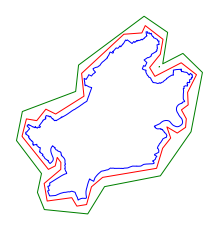

In [71]:
import matplotlib.pyplot as plt
fig,ax=plt.subplots()

ffm_poly.plot(ax=ax, facecolor='none', edgecolor='b')
a.plot(ax=ax, facecolor='none', edgecolor='g')
b.plot(ax=ax, facecolor='none', edgecolor='r')

ax.set_axis_off()